### Problem 1
#### Question 3 : validate gradients

In [1]:
# USEFUL IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import mlp
import importlib

In [2]:
importlib.reload(mlp)

<module 'mlp' from '/home/adrien/Documents/IFT6135/assigment1/practical/mlp.py'>

In [3]:
# read the data
data = pd.read_csv("../../mnist_train.csv")

In [4]:
X = data.values[:,1:]/255
Y = data.values[:,0]

In [5]:
model = mlp.MLP_2L(784, 500, 500, 10, init="glorot", activation="identity" )    

Input dimension 784	Layer 1 dimension 500	Layer 2 dimension 500	Output dimension 10	 Initilization method glorot	Activation function identity
Total number of parameters : 648010


In [6]:
N = []
diff_grad = []
for i in range(0,4):
    for k in [1,5]:
        N.append(k*10**i)
        diff_grad.append(max([model.check_grad_w2(X[1:2],Y[1:2], index, 1/(k*10**i)) for index in range(10) ] ) )

Text(0, 0.5, '$\\max_{1 \\leq i \\leq p} |\\nabla^N_i - \\frac{\\partial L}{\\partial \\theta_i}| $\t\t\t')

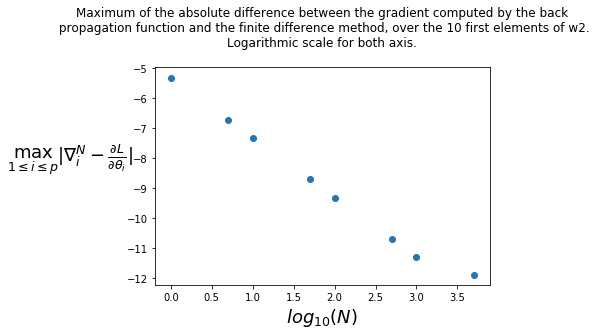

In [10]:
plt.scatter(np.log10(N),np.log10(diff_grad))
plt.title("Maximum of the absolute difference between the gradient computed by the back\n propagation function and the finite difference method, over the 10 first elements of w2.\nLogarithmic scale for both axis.\n")
plt.xlabel("$log_{10}( N )$",fontsize=18)
plt.ylabel("$\\max_{1 \\leq i \\leq p} |\\nabla^N_i - \\frac{\\partial L}{\\partial \\theta_i}| $\t\t\t", rotation=0, fontsize=18)


As we can see, as $N$ increases, and consequently $\epsilon = \frac{1}{N}$ decreases $\max_{1 \leq i \leq p} |\nabla^N_i - \frac{\partial L}{\partial \theta_i}| $ decreases and tends to zero. This shows that we compute well the gradient.